<img align = 'center' src="./Images/ML_SWE.jpg" alt = 'image' width = '1000'/>


# Analysis of Parameter Grid Search Results

Steven Pestana & Preetika Kaur

---

In the training of the model, there are many parameter that can be tuned, such as:
* the activation function used in each layer
* in model.fit():
    * shuffle
    * branch_size
* the number of layers
* the number of nodes within each layer
* the number of epochs
* including VIIRS snow cover fraction as a new feature

The script training-sensitivity.py runs a grid search across these parameters, and this notebook reads the results (RMSE and R2 metrics) to compare training performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Some data cleanup
## Add column for each layer with number of nodes for that layer
#
#df = pd.read_csv('all_tests_performance.csv')
#
#for layer in range(8):
#    df[f'layer_{layer}'] = np.nan
#    
#for i, x in enumerate(df['node_list']):
#    for layer in range(len(x.split(','))):
#        n_nodes = int(x.split(',')[layer].replace('[','').replace(']',''))
#        df[f'layer_{layer}'][i] = n_nodes
#
#df.to_csv('all_tests_performance_layers.csv')

## Initial tests:

The first set of tests looked at:
* in model.fit():
    * shuffle
    * branch_size
* the number of layers
* the number of nodes within each layer
* the number of epochs

VIIRS snow cover fraction was included as a new feature in all tests.

In [3]:
df = pd.read_csv('all_tests_performance_layers.csv')

In [4]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Region,R2,RMSE,R2_fSCA,RMSE_fSCA,nLayers,node_list,epochs,...,shuffle,activation,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7
0,0,0,N_Sierras,0.79,16.52,0.78,17.02,6,"[128, 128, 64, 64, 32, 16]",1,...,True,relu,128.0,128.0,64.0,64.0,32.0,16.0,NaN,NaN
1,1,1,S_Sierras_Low,0.57,16.60,0.51,17.71,6,"[128, 128, 64, 64, 32, 16]",1,...,True,relu,128.0,128.0,64.0,64.0,32.0,16.0,NaN,NaN
2,2,2,S_Sierras_High,0.67,27.14,0.66,27.17,6,"[128, 128, 64, 64, 32, 16]",1,...,True,relu,128.0,128.0,64.0,64.0,32.0,16.0,NaN,NaN


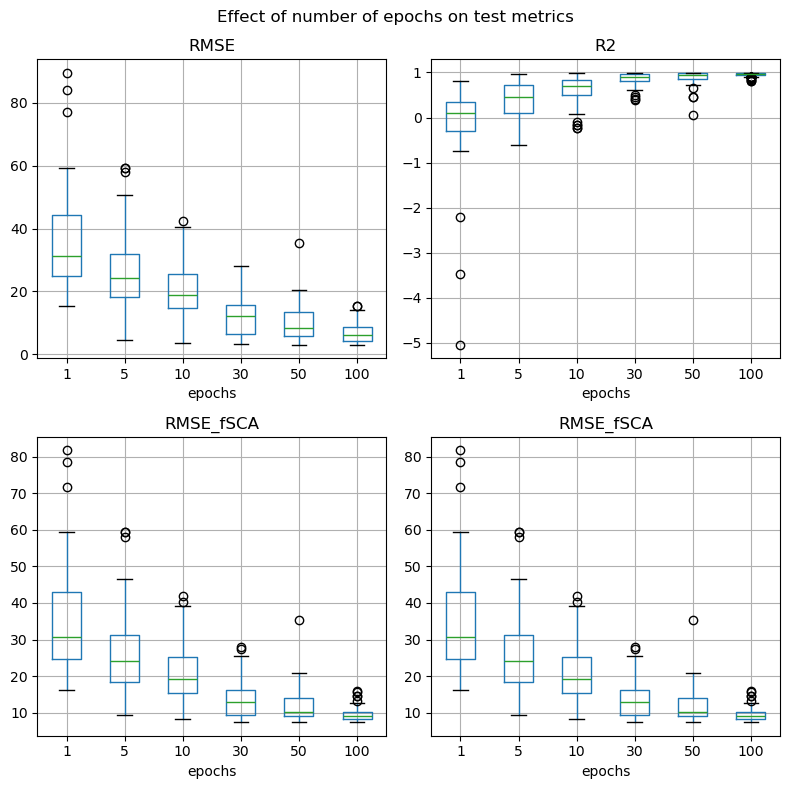

In [5]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8), tight_layout=True)
[ax1, ax2, ax3, ax4] = axes.ravel()
df.boxplot(by='epochs',column='RMSE',  ax=ax1)
df.boxplot(by='epochs',column='R2',ax=ax2)
df.boxplot(by='epochs',column='RMSE_fSCA',  ax=ax3)
df.boxplot(by='epochs',column='RMSE_fSCA',ax=ax4)
fig.suptitle('Effect of number of epochs on test metrics');

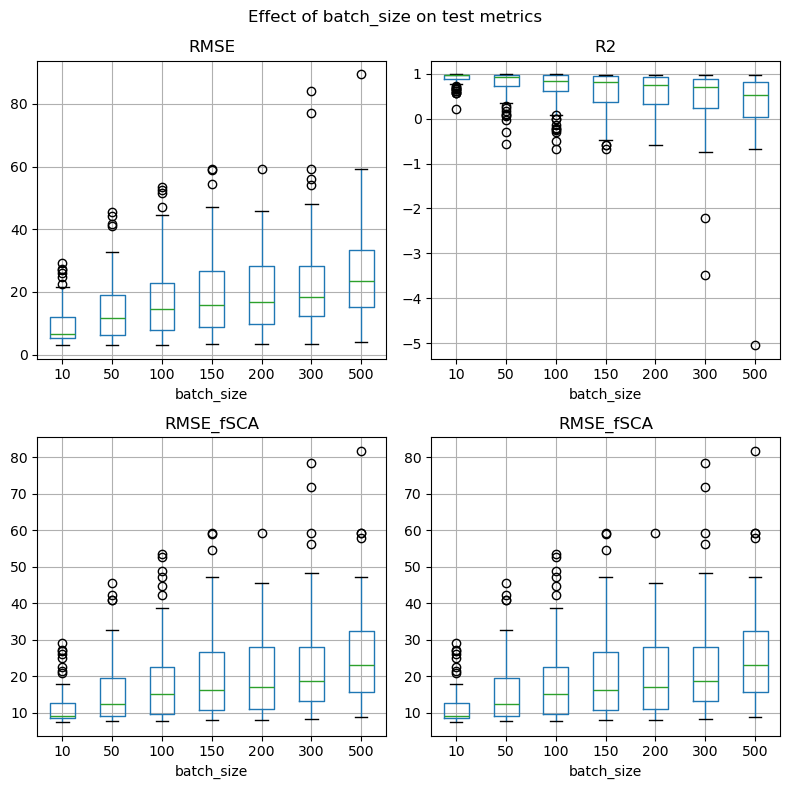

In [6]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8), tight_layout=True)
[ax1, ax2, ax3, ax4] = axes.ravel()
df.boxplot(by='batch_size',column='RMSE',  ax=ax1)
df.boxplot(by='batch_size',column='R2',ax=ax2)
df.boxplot(by='batch_size',column='RMSE_fSCA',  ax=ax3)
df.boxplot(by='batch_size',column='RMSE_fSCA',ax=ax4)
fig.suptitle('Effect of batch_size on test metrics');

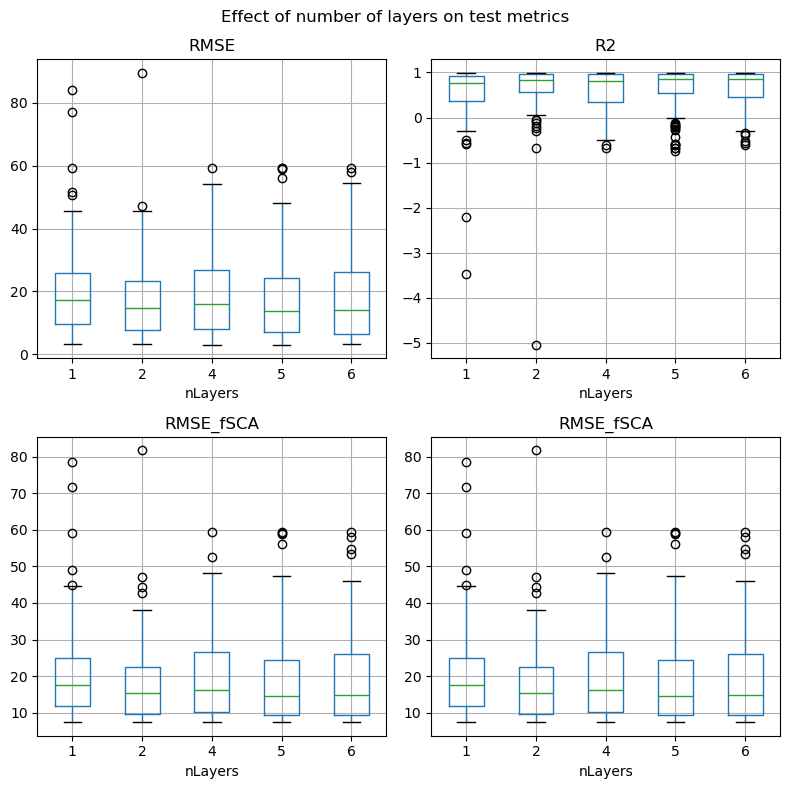

In [7]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8), tight_layout=True)
[ax1, ax2, ax3, ax4] = axes.ravel()
df.boxplot(by='nLayers',column='RMSE',  ax=ax1)
df.boxplot(by='nLayers',column='R2',ax=ax2)
df.boxplot(by='nLayers',column='RMSE_fSCA',  ax=ax3)
df.boxplot(by='nLayers',column='RMSE_fSCA',ax=ax4)
fig.suptitle('Effect of number of layers on test metrics');

-----

Look at the test of different activation methods

## Activation function tests

All other parameters were set to their original (default) values, but the layers [acivation functions](https://keras.io/api/layers/activations/) were varied:

In [8]:
df2 = pd.read_csv('all_tests_performance_activation.csv')

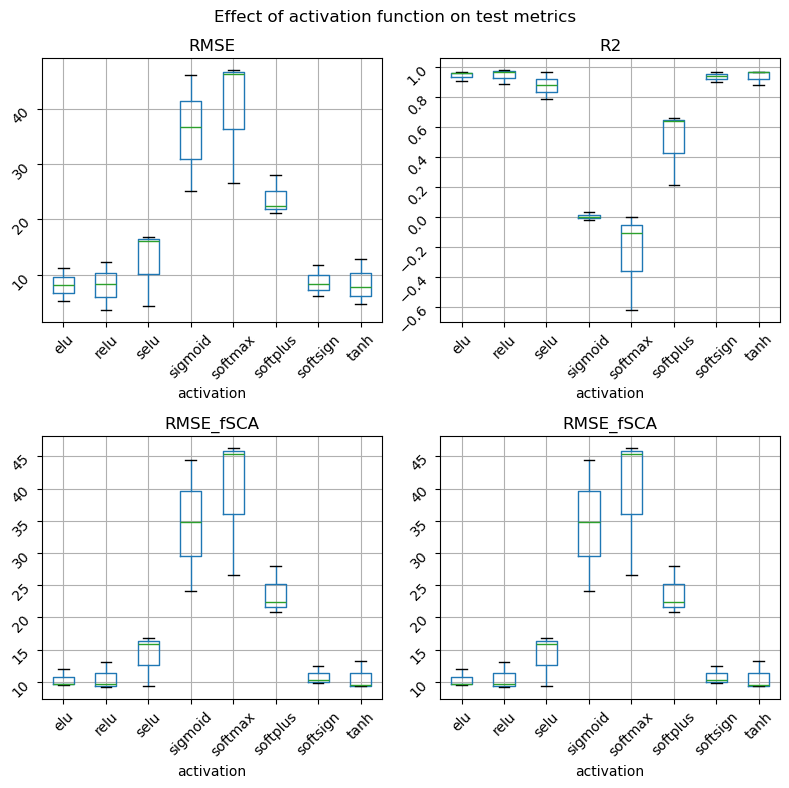

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8), tight_layout=True)
[ax1, ax2, ax3, ax4] = axes.ravel()
df2.boxplot(by='activation',column='RMSE',  ax=ax1)
df2.boxplot(by='activation',column='R2',ax=ax2)
df2.boxplot(by='activation',column='RMSE_fSCA',  ax=ax3)
df2.boxplot(by='activation',column='RMSE_fSCA',ax=ax4)
fig.suptitle('Effect of activation function on test metrics');
for this_ax in axes.ravel():
    this_ax.tick_params(labelrotation=45);